<b> Trial Diagnostic Plots on HSC data </b>

Author: Camille Avestruz

Date Created: December 2017

In [64]:
from astropy.io import fits

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#  Set the HSC data file in fits format
fitsfile='/home/babyostrich/data/LSSTDESC/HSC/HSC_WIDE_WIDE_GAMA15H_forced.fits'

In [42]:
# Open and inspect the file.  This fits file has two blocks, the data is in block 1.
# Refer to astropy documentation: http://docs.astropy.org/en/stable/io/fits/
hdulist = fits.open(fitsfile)

# Check that the 0th block contains data
print "0th block is image: ",hdulist[0].is_image
type(hdulist[1].data)

0th block is image:  True


astropy.io.fits.fitsrec.FITS_rec

In [41]:
print hdulist[0].header
print hdulist[1].header

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [46]:
# Let's collect the columns to view, and the data in a table
data_columns = hdulist[1].columns
table_data = hdulist[1].data

In [109]:
# data_columns contains a list of strings labeling the columns
# You should cross-check this with the schema descriptions here: 
#  https://hsc-release.mtk.nao.ac.jp/schema/#:legend
print data_columns.info()

name:
    ['object_id', 'object_id_isnull', 'ra', 'ra_isnull', 'dec', 'dec_isnull', 'tract', 'tract_isnull', 'patch', 'patch_isnull', 'merge_peak_g', 'merge_peak_g_isnull', 'merge_peak_r', 'merge_peak_r_isnull', 'merge_peak_i', 'merge_peak_i_isnull', 'merge_peak_z', 'merge_peak_z_isnull', 'merge_peak_y', 'merge_peak_y_isnull', 'gcountinputs', 'gcountinputs_isnull', 'rcountinputs', 'rcountinputs_isnull', 'icountinputs', 'icountinputs_isnull', 'zcountinputs', 'zcountinputs_isnull', 'ycountinputs', 'ycountinputs_isnull', 'iflags_pixel_bright_object_center', 'iflags_pixel_bright_object_center_isnull', 'a_g', 'a_g_isnull', 'a_r', 'a_r_isnull', 'a_i', 'a_i_isnull', 'a_z', 'a_z_isnull', 'a_y', 'a_y_isnull', 'gflux_kron_err', 'gflux_kron_err_isnull', 'rflux_kron_err', 'rflux_kron_err_isnull', 'iflux_kron_err', 'iflux_kron_err_isnull', 'zflux_kron_err', 'zflux_kron_err_isnull', 'yflux_kron_err', 'yflux_kron_err_isnull', 'gflux_kron_err_2', 'gflux_kron_err_2_isnull', 'rflux_kron_err_2', 'rflux_k

In [63]:
# As a first step, let's plot the ra and dec.  Note, normally we'd need to 
# select out items where ra or dec is null with a mask.  But, there are ra and dec values for
# all items, so the np.where method returns empty arrays.

import numpy as np

#  Check to see that we have all ra and dec for plotting
print np.where(table_data['dec_isnull'])
print np.where(table_data['ra_isnull'])

(array([], dtype=int64),)
(array([], dtype=int64),)


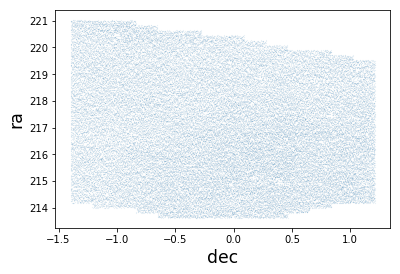

In [72]:
# Let's plot a subset of the ra and dec to get an idea of the area coverage of this 
# subset of the data
plt.scatter(table_data['dec'][::100], table_data['ra'][::100],s=0.001)
plt.xlabel('dec',fontsize='xx-large')
plt.ylabel('ra',fontsize='xx-large')

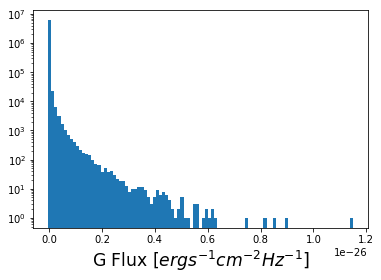

In [155]:
# Let's now compare histogram of fluxes and magnitudes depending on how that is calculated. 
# Some values are nan - a quick min/max check on the table column values would show this.

column_name = 'gcmodel_flux'

plt.hist(table_data[column_name][~np.isnan(table_data[column_name])],bins=99)
plt.yscale('log', nonposy='clip')
plt.xlabel('G Flux $[erg s^{-1} cm^{-2} Hz^{-1}]$',fontsize='xx-large')

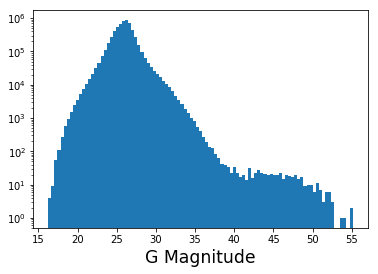

In [156]:
# Let's check the magnitudes - remove nan and infinite values!
column_label = 'gcmodel_mag'

# Selecting for "np.isfinite" values gets rid of both nan and inf values.
plt.hist(table_data[column_label][np.isfinite(table_data[column_label])],bins=99)
plt.yscale('log', nonposy='clip')
plt.xlabel('G Magnitude',fontsize='xx-large')

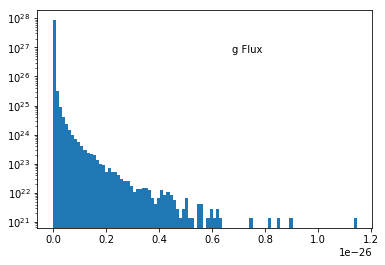

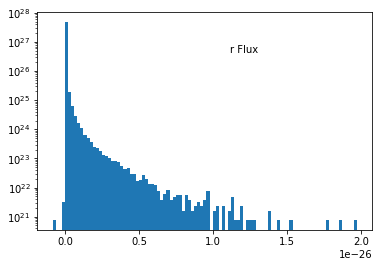

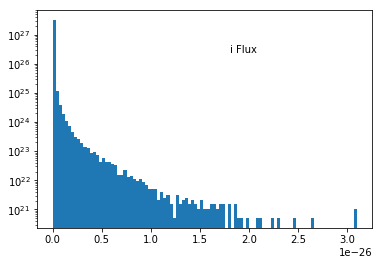

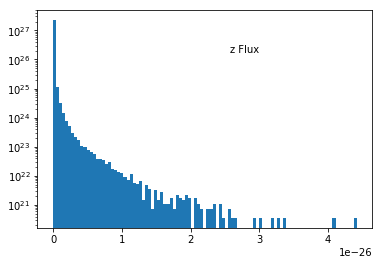

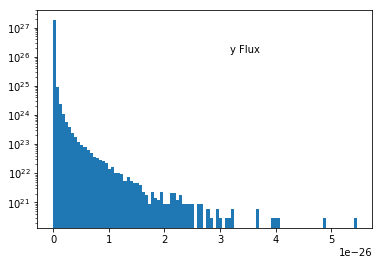

In [184]:
# Let's generalize this for all grizy fluxes and magnitudes

def histogram_column_finite_vals(table_data, column_label, annotation) :
    '''Plot a histogram on an axis using a column from the table data.'''
    plt.hist(table_data[column_label][np.isfinite(table_data[column_label])],
             bins=99,normed=True)
    plt.yscale('log',nonposy='clip')
    plt.annotate(annotation, (0.6,0.8), xycoords='figure fraction')

for column_label, annotation in \
    zip([c+'cmodel_flux' for c in ['g', 'r', 'i', 'z', 'y']],
        [c+' Flux' for c in ['g', 'r', 'i', 'z', 'y']]) :
        histogram_column_finite_vals(table_data, column_label, annotation)
        plt.show()


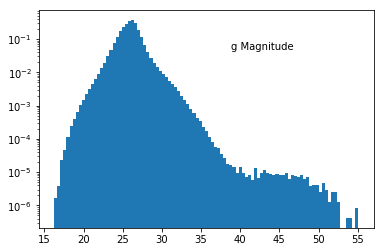

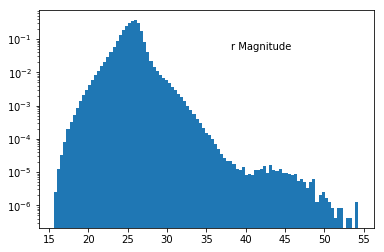

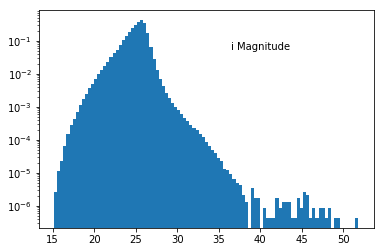

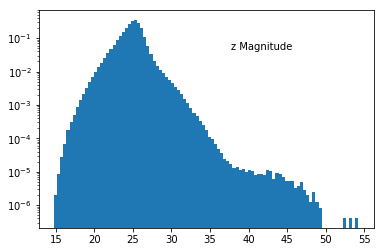

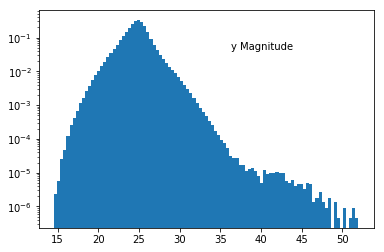

In [161]:
for column_label, annotation in \
    zip([c+'cmodel_mag' for c in ['g', 'r', 'i', 'z', 'y']],
        [c+' Magnitude' for c in ['g', 'r', 'i', 'z', 'y']]) :
        histogram_column_finite_vals(table_data, column_label, annotation)
        plt.show()

As a next example diagnostic plot, let's look at a color-color plot.

/home/babyostrich/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in subtract
/home/babyostrich/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in subtract


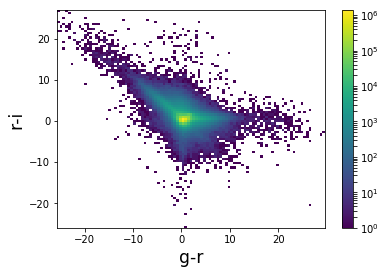

In [183]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np

g = 'gcmodel_mag'
r = 'rcmodel_mag'
i = 'icmodel_mag'

r_i_diff = (table_data[r] - table_data[i])
g_r_diff = (table_data[g] - table_data[r])
r_i_diff_fin = r_i_diff[np.isfinite(r_i_diff) & np.isfinite(g_r_diff)]
g_r_diff_fin = g_r_diff[np.isfinite(r_i_diff) & np.isfinite(g_r_diff)]

plt.hist2d(g_r_diff_fin, r_i_diff_fin, bins=99, norm=LogNorm())
plt.colorbar()
plt.xlabel('g-r',fontsize='xx-large')
plt.ylabel('r-i',fontsize='xx-large')

plt.show()


Let's now overlay the magnitude distribution for objects detected in more than one band.